In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pickle

1. Reading and preparing the data 

In [3]:
weather = pd.read_csv("weather1.csv", index_col="DATE")

In [4]:
weather

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV01
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-06,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-07,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-08,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-09,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,9.17,NaN,NaN,0.06,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,8.05,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,8.95,NaN,NaN,0.18,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#This will identify all the null in each column and the percentages

weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
ACMH       0.496479
ACSH       0.496435
AWND       0.385749
FMTM       0.554441
PGTM       0.460039
PRCP       0.000132
SNOW       0.000264
SNWD       0.000220
TAVG       0.738139
TMAX       0.000088
TMIN       0.000088
TSUN       0.998636
WDF1       0.496699
WDF2       0.583883
WDF5       0.587536
WDFG       0.774624
WDFM       0.999956
WESD       0.732814
WSF1       0.496567
WSF2       0.583883
WSF5       0.587580
WSFG       0.671552
WSFM       0.999912
WT01       0.657645
WT02       0.939310
WT03       0.939574
WT04       0.983672
WT05       0.983628
WT06       0.991242
WT07       0.995247
WT08       0.776164
WT09       0.992342
WT11       0.999384
WT13       0.903838
WT14       0.960963
WT15       0.998152
WT16       0.671640
WT17       0.997359
WT18       0.939838
WT19       0.999956
WT21       0.999780
WT22       0.997843
WV01       0.999956
dtype: float64

In [6]:
#Selecting the important column from the dataset and renaming them

core_weather = weather[["TMAX", "TMIN"]].copy()
core_weather.columns = ["temp_max", "temp_min"]

In [7]:
core_weather

,temp_max,temp_min
DATE,,
1960-01-05,38.0,31.0
1960-01-06,38.0,28.0
1960-01-07,38.0,35.0
1960-01-08,49.0,35.0
1960-01-09,37.0,22.0
...,...,...
2022-03-17,55.0,45.0
2022-03-18,63.0,46.0
2022-03-19,60.0,46.0


In [8]:
core_weather[pd.isnull(core_weather["temp_min"])]

,temp_max,temp_min
DATE,,
1960-05-01,NaN,NaN
2022-03-21,NaN,NaN


In [9]:
core_weather = core_weather.fillna(method="ffill")

In [10]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

temp_max    0.0
temp_min    0.0
dtype: float64

2. Verifying the correct data types

In [11]:
#checking the type of data type

core_weather.dtypes

temp_max    float64
temp_min    float64
dtype: object

In [12]:
core_weather.index

Index(['1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09',
       '1960-01-10', '1960-01-11', '1960-01-12', '1960-01-13', '1960-01-14',
       ...
       '2022-03-12', '2022-03-13', '2022-03-14', '2022-03-15', '2022-03-16',
       '2022-03-17', '2022-03-18', '2022-03-19', '2022-03-20', '2022-03-21'],
      dtype='object', name='DATE', length=22722)

In [13]:
#turning index to date time type
core_weather.index = pd.to_datetime(core_weather.index)

In [14]:
core_weather.index

DatetimeIndex(['1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10', '1960-01-11', '1960-01-12',
               '1960-01-13', '1960-01-14',
               ...
               '2022-03-12', '2022-03-13', '2022-03-14', '2022-03-15',
               '2022-03-16', '2022-03-17', '2022-03-18', '2022-03-19',
               '2022-03-20', '2022-03-21'],
              dtype='datetime64[ns]', name='DATE', length=22722, freq=None)

In [15]:
#Check for missing value defined in data documentation
core_weather.apply(lambda x: (x == 9999).sum())

temp_max    0
temp_min    0
dtype: int64

3. Analyzing the data

<AxesSubplot:xlabel='DATE'>

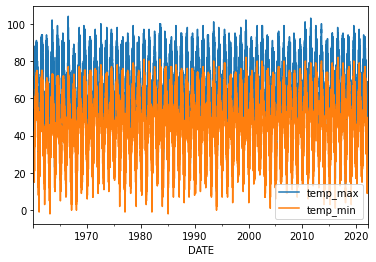

In [16]:
core_weather[["temp_max", "temp_min"]].plot()

4. Figuring out what to predict. 
   In this example we are trying to predict the next day's max temperature.

In [17]:
#Creating a target, shift(-1) will pull every row back one position

core_weather["target"] = core_weather.shift(-1)["temp_max"]

In [18]:
#This shows another column created for target 

core_weather

,temp_max,temp_min,target
DATE,,,
1960-01-05,38.0,31.0,38.0
1960-01-06,38.0,28.0,38.0
1960-01-07,38.0,35.0,49.0
1960-01-08,49.0,35.0,37.0
1960-01-09,37.0,22.0,31.0
...,...,...,...
2022-03-17,55.0,45.0,63.0
2022-03-18,63.0,46.0,60.0
2022-03-19,60.0,46.0,62.0


In [19]:
#This will delete the last row that shows NA

core_weather = core_weather.iloc[:-1,:].copy()

In [20]:
#This is to make sure the row got deleted

core_weather

,temp_max,temp_min,target
DATE,,,
1960-01-05,38.0,31.0,38.0
1960-01-06,38.0,28.0,38.0
1960-01-07,38.0,35.0,49.0
1960-01-08,49.0,35.0,37.0
1960-01-09,37.0,22.0,31.0
...,...,...,...
2022-03-16,62.0,41.0,55.0
2022-03-17,55.0,45.0,63.0
2022-03-18,63.0,46.0,60.0


5. Preparing to train the data

In [21]:
X = core_weather['temp_min'].values.reshape(-1,1)
y = core_weather['temp_max'].values.reshape(-1,1)

#Spliting the data into 70% training and 30% testing set

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4, random_state=42)

In [22]:
#Fitting the Linear Regression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [23]:
# Checking the model with intercept and coefficients (slope)
# Print the intercept and coefficients

print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: [13.41795877]
slope: [[1.02012928]]


6. Predicting the Test set results

In [24]:
y_pred = model.predict(X_test)

In [25]:
# Printing the prediction results

df_temp = pd.DataFrame({'Actual Temp': y_test.flatten(), 'Predicted Temp': y_pred.flatten()})
df_temp

,Actual Temp,Predicted Temp
0,33.0,34.840674
1,77.0,87.887396
2,64.0,59.323776
3,33.0,37.901062
4,39.0,43.001708
...,...,...
9084,72.0,71.565328
9085,38.0,39.941320
9086,71.0,81.766621
9087,51.0,49.122484


7. Visualizing the results

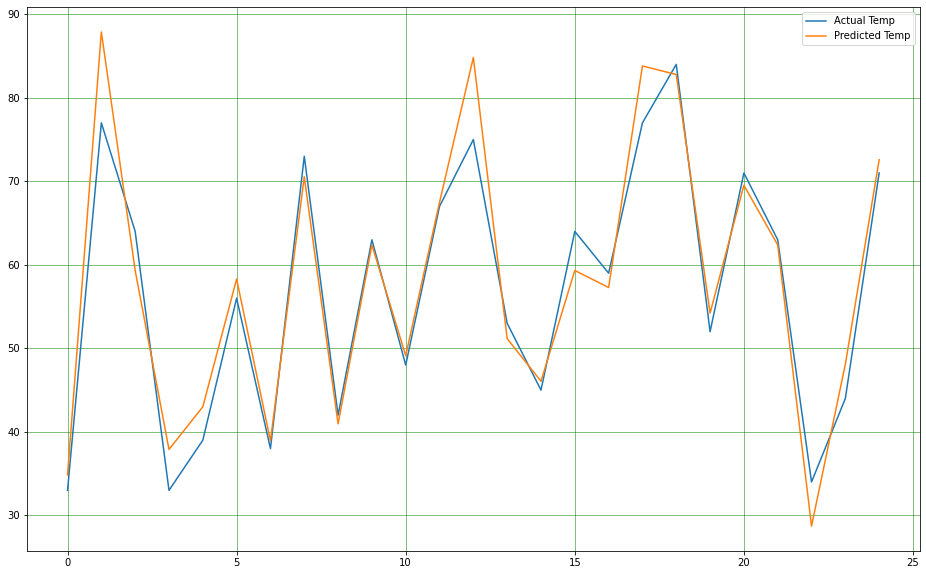

In [26]:
#Comparing the actual temp and predicted temp using line graph

df1 = df_temp.head(25)
df1.plot(kind='line', figsize=(16,10))
plt.grid(which='major', linestyle='-',linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':',linewidth='0.5', color='black')
plt.show()

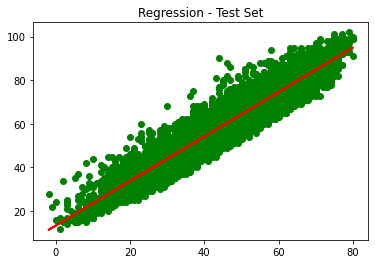

In [27]:
#Drawing the regression line on the Test set

plt.scatter(X_test, y_test,  color='green')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Regression - Test Set')
plt.show()

Scatter plot graph between X_test and y_test datasets and we draw a regression line.The straight red line shows our algorithm is correct. Our model looks like a good fit for this data.

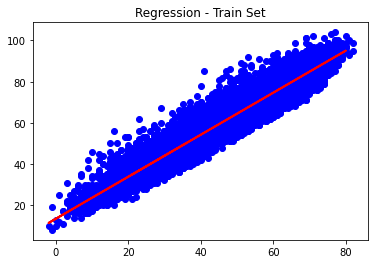

In [28]:
#Drawing regression line on the Train Set

plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Regression - Train Set')
plt.show()

Scatter plot graph between X_train and y_train datasets and we draw a regression line.The straight red line shows our algorithm is correct.

8. Evaluation metrics 

In [29]:
# Calculating coefficients
print('Coefficients: \n', model.coef_)

# Calculating mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

# Calculating mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 

# Calculating root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Calculating R-squared (or coefficient of determinationnote. 1 is a perfect prediction.
print('Coefficient of Determination:', metrics.r2_score(y_test, y_pred))

Coefficients: 
 [[1.02012928]]
Mean Absolute Error: 4.074790501649451
Mean Squared Error: 26.770982560829044
Root Mean Squared Error: 5.174068279490428
Coefficient of Determination: 0.9128342107360793


RESULTS:

- The MSE is the average of the square of the prediction errors. The larger the number, the larger is the error. We can see that the error is 26.77, so it is high. But there is not a correct value for the MSE. Of course, the lower the error, the better, and zero means the model is perfect. Since there is no correct answer, we cannot conclude that our prediction model is incorrect.

- The RMSE is the error rate by the square root of MSE. We can see that the RMSE is 5.17, which is about less than 15% of the 'mean' value of the percentage of all the temperature. This means the algorithm did a decent job. It has made a fairly good prediction.

- The MAE is the difference between the original and predicted values extracted by the averaged absolute difference over the data. We can see that it is 4.07, and it is slightly smaller than the RMSE.

- The Coefficient of Determination is about 90%, which is good. The higher the value the better is the model


In [30]:
#training
print('R^2 of Training:', metrics.r2_score(X_train, y_train))
#Testing
print('R^2 of Testing:', metrics.r2_score(X_test, y_test))

# Calculating root mean squared error (training)
print('Root Mean Squared Error (Training):', np.sqrt(metrics.mean_squared_error(X_train, y_train)))
# Calculating root mean squared error (Testing)
print('Root Mean Squared Error (Testing):', np.sqrt(metrics.mean_squared_error(X_test, y_test)))

# Calculating mean squared error (training)
print('Mean Squared Error (Training):', metrics.mean_squared_error(X_train, y_train))
# Calculating mean squared error (testing)
print('Mean Squared Error (Testing):', metrics.mean_squared_error(X_test, y_test))

# Calculating mean absolute error (training)
print('Mean Absolute Error:', metrics.mean_absolute_error(X_train, y_train))
# Calculating mean absolute error (testing)
print('Mean Absolute Error:', metrics.mean_absolute_error(X_test, y_test))

# Calculating max error (training)
print('Max Error:', metrics.max_error(X_train, y_train))
# Calculating max error (testing)
print('Max Error:', metrics.max_error(X_test, y_test))

R^2 of Training: 0.13594549208899853
R^2 of Testing: 0.12616915171085574
Root Mean Squared Error (Training): 15.289635727536192
Root Mean Squared Error (Testing): 15.389815065348465
Mean Squared Error (Training): 233.77296068075117
Mean Squared Error (Testing): 236.84640774562658
Mean Absolute Error: 14.366710680751174
Mean Absolute Error: 14.491913301793376
Max Error: 44.0
Max Error: 46.0


In [31]:
from sklearn.metrics import mean_squared_error as mse

y_pred = model.predict(X_test)
print("Mean Squared Error on Training Data --> {}\nMean Squared Error on Test Data --> {}".format(mse(y_train, model.predict(X_train)), mse(y_test, y_pred)))

Mean Squared Error on Training Data --> 27.260959867277617
Mean Squared Error on Test Data --> 26.770982560829044


In [32]:
#print(test)
print(y_pred)
for x in y_pred:
    if x >= 100:
        print("Mostly Sunny")
    elif x >= 90 and x <= 99:
        print("Sunny")
    elif x >= 76 and x < 90:
        print("Partly Cloudy")
    elif x >= 56 and x < 75:
        print("Cloudy")
    elif x >= 55:
        print("Snow showers")
    else:
        print("f")

[[34.8406737 ]
 [87.88739639]
 [59.32377648]
 ...
 [81.76662069]
 [49.12248366]
 [50.14261294]]
f
Partly Cloudy
Cloudy
f
f
Cloudy
f
Cloudy
f
Cloudy
f
Cloudy
Partly Cloudy
f
f
Cloudy
Cloudy
Partly Cloudy
Partly Cloudy
f
Cloudy
Cloudy
f
f
Cloudy
f
Cloudy
f
Cloudy
Snow showers
Cloudy
Partly Cloudy
f
Partly Cloudy
Partly Cloudy
Partly Cloudy
Cloudy
Partly Cloudy
Cloudy
f
f
f
Cloudy
f
Cloudy
f
Cloudy
Cloudy
f
Cloudy
Partly Cloudy
f
Cloudy
f
f
f
Cloudy
f
Cloudy
f
Partly Cloudy
f
Cloudy
Partly Cloudy
Cloudy
Partly Cloudy
f
f
Partly Cloudy
Snow showers
f
Cloudy
Cloudy
Cloudy
Cloudy
Partly Cloudy
Cloudy
f
Cloudy
f
Partly Cloudy
Cloudy
f
Cloudy
Cloudy
Cloudy
Cloudy
Partly Cloudy
f
f
f
Cloudy
Snow showers
Partly Cloudy
Partly Cloudy
Cloudy
Partly Cloudy
Cloudy
Cloudy
Cloudy
Cloudy
f
f
Partly Cloudy
Snow showers
f
f
f
Cloudy
f
f
Cloudy
Partly Cloudy
Cloudy
f
Partly Cloudy
Partly Cloudy
Cloudy
Cloudy
Partly Cloudy
Cloudy
Partly Cloudy
f
Cloudy
Cloudy
f
f
f
f
f
Partly Cloudy
f
Cloudy
f
Partly Cloudy

In [38]:
#ignore
x_train = []
y_train = []
x_test = []
y_test = []

# Setting 'n_future' days to predict using 'n_past'days. 
n_future = 1.5
n_past = 10

# Getting number of hours 
n_future = int(n_future * 24)
n_past = int(n_past * 24) 

for i in range(0,len(X_train)-n_past-n_future+1):
    x_train.append(X_train[i : i + n_past , 0])     
    y_train.append(X_train[i + n_past : i + n_past + n_future , 0 ])
for i in range(0,len(y_test)-n_past-n_future+1):
    x_test.append(y_test[i : i + n_past , 0])  
    y_test.append(y_test[i + n_past : i + n_past + n_future , 0 ])

x_train, y_train, x_test, y_test = np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)


In [39]:
#ignore
print("Training data:")
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_test: ", x_test.shape)
print("y_test: ", y_test.shape)

Training data:
x_train:  (13357, 240)
y_train:  (13357, 36)
x_test:  (0,)
y_test:  (0,)


In [45]:
#ignore
plt_test = []
plt_pred = []

for i in range(12):
    plt_test.append(y_train[1239+36*i])
    plt_pred.append(y_pred[1333+36*i])

plt_test = np.concatenate(plt_test).ravel()
plt_pred = np.concatenate(plt_pred).ravel()


<function matplotlib.pyplot.show(close=None, block=None)>

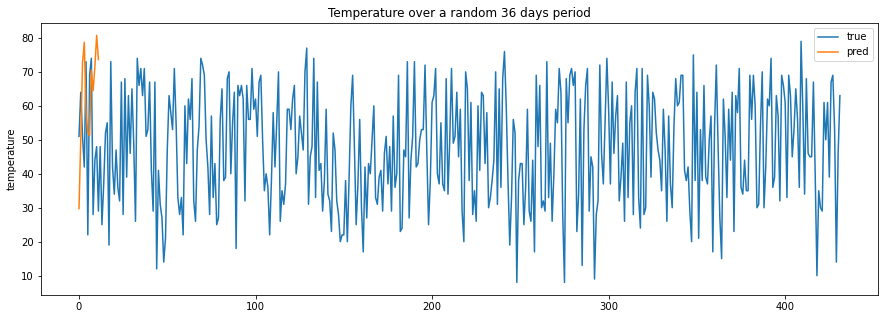

In [46]:
#ignore
plt.figure(figsize=(15, 5))
plt.plot(plt_test, label='true')
plt.plot(plt_pred, label='pred')
plt.ylabel('temperature')
plt.title('Temperature over a random 36 days period')
plt.legend()
plt.show

From the above performance measure, we got the mean squared errors on training and test data 27.26 and 26.7.
This shows the mean squared errors are closer between test and train datasets. All in all the model is not overfitting the data.

In [33]:
with open ('forecast_model.pkl', "wb") as f:
    pickle.dump(model, f)

In [34]:
del model

In [35]:
with open('forecast_model.pkl', "rb") as f:
    model = pickle.load(f)

In [36]:
model

LinearRegression()

In [37]:
y_pred = model.predict(X_test)
df_temp = pd.DataFrame({'Actual Temp': y_test.flatten(), 'Predicted Temp': y_pred.flatten()})
df_temp

,Actual Temp,Predicted Temp
0,33.0,34.840674
1,77.0,87.887396
2,64.0,59.323776
3,33.0,37.901062
4,39.0,43.001708
...,...,...
9084,72.0,71.565328
9085,38.0,39.941320
9086,71.0,81.766621
9087,51.0,49.122484
